Ratings analysis by app pegi rating

Purpose This notebook will find out how an app's pegi rating influences this app's rating. Will apps be more likely to get higher ratings in google play when they have certain pegi ratings? Will some pegi ratings help apps get higher ratings in apple store?

In [1]:
import math
import pandas as pd
import numpy as np

from matplotlib.pylab import plt

from os.path import exists, isfile

Load datasets

In [2]:
if not exists("../../datasets/2100_clean_google.csv"):
    print ("Missing dataset file")
    
df_google=pd.read_csv("../../datasets/2100_clean_google.csv")
df_google.head()

,google_title,google_genre,google_rating,google_reviews,google_size,google_price,google_pegi,log_google_reviews,normed_google_rating,z_score_google
0,Photo Editor & Candy Camera & Grid & ScrapBook,Utilities,4.1,159,19.0,0.0,Everyone,2.201397,0.82,-0.143135
1,Coloring book moana,Utilities,3.9,967,14.0,0.0,Everyone,2.985426,0.78,-0.537987
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Utilities,4.7,87510,8.7,0.0,Everyone,4.942058,0.94,1.041422
3,Sketch - Draw & Paint,Utilities,4.5,215644,25.0,0.0,Teen,5.333737,0.90,0.646570
4,Pixel Draw - Number Art Coloring Book,Utilities,4.3,967,2.8,0.0,Everyone,2.985426,0.86,0.251718


In [3]:
if not exists("../../datasets/2200_clean_apple.csv"):
    print ("Missing dataset file")
    
df_apple=pd.read_csv("../../datasets/2200_clean_apple.csv")
df_apple.head()

,apple_id,apple_title,apple_size,apple_price,apple_reviews,apple_rating,apple_pegi,apple_genre,normed_apple_rating,z_score_apple,log_apple_reviews
0,281656475,PAC-MAN Premium,96.119141,3.99,21292,4.0,Everyone,Games,0.8,-0.083987,4.328216
1,281796108,Evernote - stay organized,151.232422,0.00,161065,4.0,Everyone,Business,0.8,-0.083987,5.207001
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",95.867188,0.00,188583,3.5,Everyone,Others,0.7,-0.806018,5.275503
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",122.558594,0.00,262241,4.0,Teen,Lifestyle,0.8,-0.083987,5.418701
4,282935706,Bible,88.476562,0.00,985920,4.5,Everyone,Books & Reference,0.9,0.638043,5.993842


The frequency of different app pegi ratings.

This chart shows the proportion of each pegi rating in quantity.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

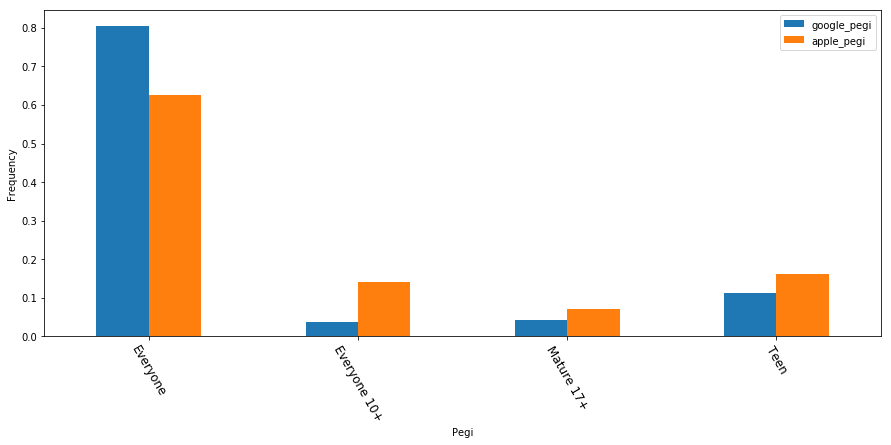

In [4]:
fig, ax = plt.subplots(figsize=(15, 6))

google_genre = df_google[df_google['google_pegi'] != 'Unrated'].groupby('google_pegi')['google_pegi'].count() / df_google['google_pegi'].count()
apple_genre = df_apple[df_apple['apple_pegi'] != 'Unrated'].groupby('apple_pegi')['apple_pegi'].count() / df_apple['apple_pegi'].count()
df_genre =pd.concat([google_genre, apple_genre],axis=1)

df_genre.plot(y = ['google_pegi', 'apple_pegi'], kind = 'bar', ax = ax)


ax.set_ylabel('Frequency')
ax.set_xlabel('Pegi')
plt.xticks(rotation=(-60), fontsize=12)

Load dataset: common apps

In [5]:
if not exists("../../datasets/2300_combine_kaggle_datasets.csv"):
    print ("Missing dataset file")
    
df=pd.read_csv("../../datasets/2300_combine_kaggle_datasets.csv")
df.head()

,apple_id,trim_title,apple_title,genre,apple_rating,apple_reviews,apple_size,pegi,normed_apple_rating,google_title,...,log_google_reviews,log_apple_reviews,z_score_google_rating,z_score_apple_rating,z_score_google_sub_apple,norm_google_sub_apple,google_revenue,apple_revenue,log_google_revenue,log_apple_revenue
0,898968647,Call of Duty®,Call of Duty®: Heroes,Games,4.5,179416,201.075195,Teen,0.9,Call of Duty®: Heroes,...,6.205244,5.253861,0.449144,0.638043,-0.188899,-0.02,0.00,0.00,NaN,NaN
1,1147297267,Dont Starve,Don't Starve: Shipwrecked,Games,3.5,495,604.341797,Everyone 10+,0.7,Don't Starve: Shipwrecked,...,3.166726,2.694605,-0.143135,-0.806018,0.662884,0.12,7325.32,2470.05,3.864827,3.392706
2,352670055,F,F-Sim Space Shuttle,Games,4.5,6403,72.855469,Everyone,0.9,F-Sim Space Shuttle,...,3.734560,3.806384,0.449144,0.638043,-0.188899,-0.02,27080.73,31950.97,4.432660,4.504484
3,763692274,Grand Theft Auto,Grand Theft Auto: San Andreas,Games,4.0,32533,1964.965820,Mature 17+,0.8,Grand Theft Auto: San Andreas,...,5.542778,4.512324,0.449144,-0.083987,0.533131,0.08,2439244.38,227405.67,6.387255,5.356801
4,771989093,LEGO® Friends,LEGO® Friends,Games,4.0,400,730.941406,Everyone,0.8,LEGO® Friends,...,2.931458,2.602060,0.449144,-0.083987,0.533131,0.08,4261.46,1996.00,3.629558,3.300161


Compare the normalized ratings and z score ratings of apps

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

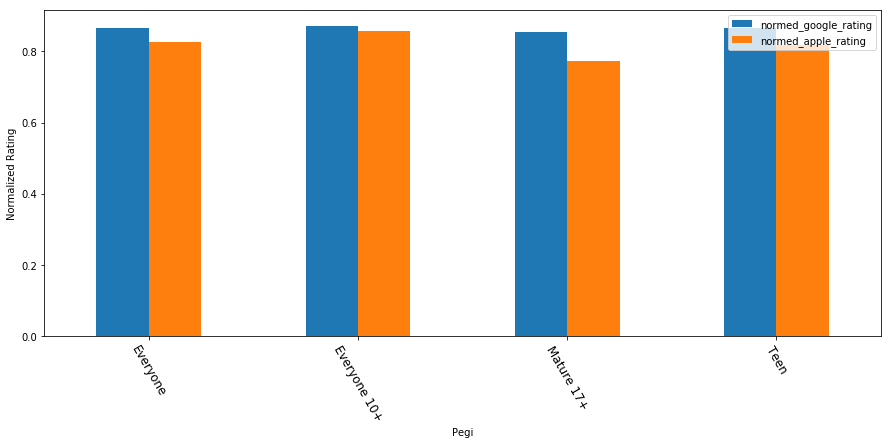

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))

google_genre = df[df['pegi'] != 'Unrated'].groupby('pegi')['normed_google_rating'].mean()
apple_genre = df[df['pegi'] != 'Unrated'].groupby('pegi')['normed_apple_rating'].mean()
df_genre =pd.concat([google_genre, apple_genre],axis=1)

df_genre.plot(y = ['normed_google_rating', 'normed_apple_rating'], kind = 'bar', ax = ax)

ax.set_ylabel('Normalized Rating')
ax.set_xlabel('Pegi')
plt.xticks(rotation=(-60), fontsize=12)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

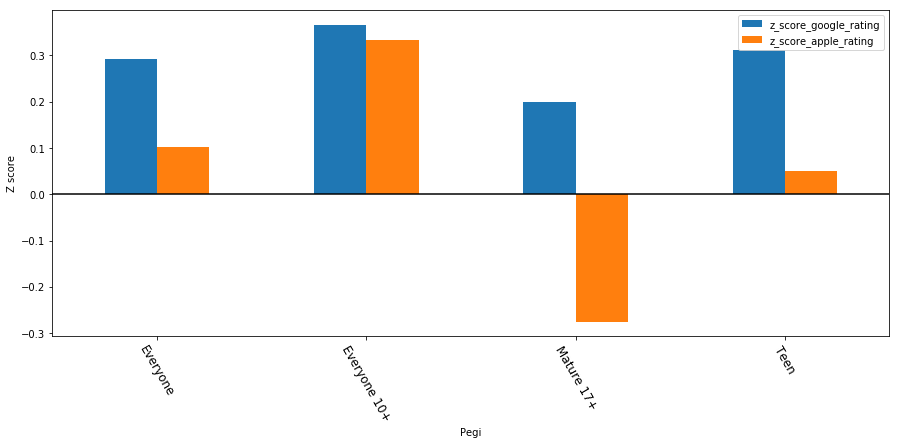

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))

google_genre = df[df['pegi'] != 'Unrated'].groupby('pegi')['z_score_google_rating'].mean()
apple_genre = df[df['pegi'] != 'Unrated'].groupby('pegi')['z_score_apple_rating'].mean()
df_genre =pd.concat([google_genre, apple_genre],axis=1)

df_genre.plot(y = ['z_score_google_rating', 'z_score_apple_rating'], kind = 'bar', ax = ax)

ax.axhline(c='k')

ax.set_ylabel('Z score')
ax.set_xlabel('Pegi')
plt.xticks(rotation=(-60), fontsize=12)

Fraction of apps with higher ratings on google play than on apple store.

In [8]:
df['fraction_z_score'] = df['z_score_google_sub_apple'] > 0
df['fraction_norm'] = df['norm_google_sub_apple'] > 0

Text(0.5, 0, 'Pegi')

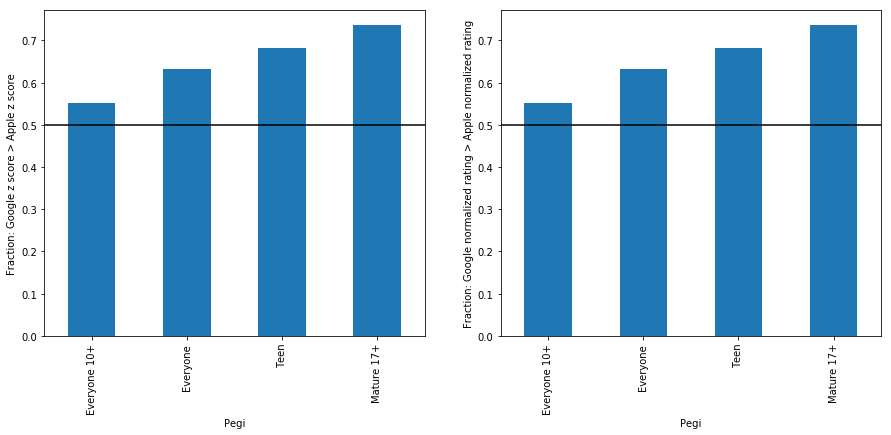

In [9]:
fig, (ax, bx) = plt.subplots(1,2,figsize=(15, 6))

fraction_df = df.groupby(['pegi'])['fraction_z_score'].mean().sort_values()
fraction_df.plot(kind='bar', ax=ax)

ax.axhline(0.5, c='k')

ax.set_ylabel('Fraction: Google z score > Apple z score')
ax.set_xlabel('Pegi')

mean_df = df.groupby(['pegi'])['fraction_norm'].mean().sort_values()
fraction_df.plot(kind='bar', ax=bx)

bx.axhline(0.5, c='k')

bx.set_ylabel('Fraction: Google normalized rating > Apple normalized rating')
bx.set_xlabel('Pegi')

The average difference between an app's rating on google play and on apple store

Text(0.5, 0, 'Pegi')

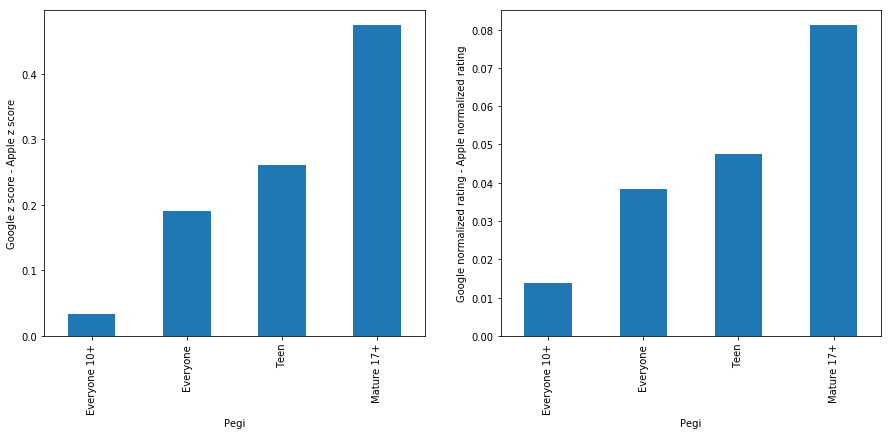

In [10]:
fig, (ax, bx) = plt.subplots(1,2,figsize=(15, 6))

fraction_df = df.groupby(['pegi'])['z_score_google_sub_apple'].mean().sort_values()
fraction_df.plot(kind='bar', ax=ax)

ax.set_ylabel('Google z score - Apple z score')
ax.set_xlabel('Pegi')

fraction_df = df.groupby(['pegi'])['norm_google_sub_apple'].mean().sort_values()
fraction_df.plot(kind='bar', ax=bx)

bx.set_ylabel('Google normalized rating - Apple normalized rating')
bx.set_xlabel('Pegi')